In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats

In [7]:
df = pd.read_csv(r"C:\Users\Riddhima\Downloads\delivery_time.csv")

In [8]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [9]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

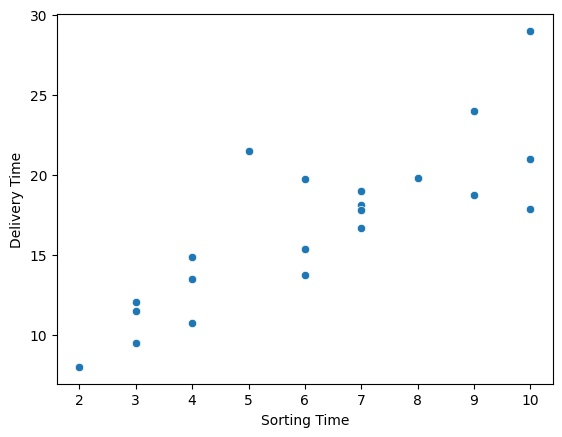

In [10]:
sns.scatterplot(x=df["Sorting Time"],y=df["Delivery Time"])

In [11]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
x = np.array(df["Sorting Time"]).reshape(-1,1)
print("Dimension: ",x.ndim)
print("Shape: ",x.shape)

Dimension:  2
Shape:  (21, 1)


In [13]:
y=np.array(df["Delivery Time"]).reshape(-1,1)
print("Dimension: ",y.ndim)
print("Shape: ",y.shape)

Dimension:  2
Shape:  (21, 1)


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [15]:
print("Lenth of X_train: ",len(x_train))
print("Lenth of X_test: ",len(x_test))
print("Lenth of Y_train: ",len(y_train))
print("Lenth of Y_test: ",len(y_test))

Lenth of X_train:  16
Lenth of X_test:  5
Lenth of Y_train:  16
Lenth of Y_test:  5


In [16]:
x_test

array([[10],
       [ 8],
       [ 7],
       [ 7],
       [ 3]], dtype=int64)

In [17]:
y_test

array([[21.  ],
       [19.83],
       [18.11],
       [17.83],
       [ 9.5 ]])

In [18]:
LR = LinearRegression()
LR.fit(x_train,y_train)
score={}

In [19]:
LR.score(x_test,y_test)

0.8595008302153753

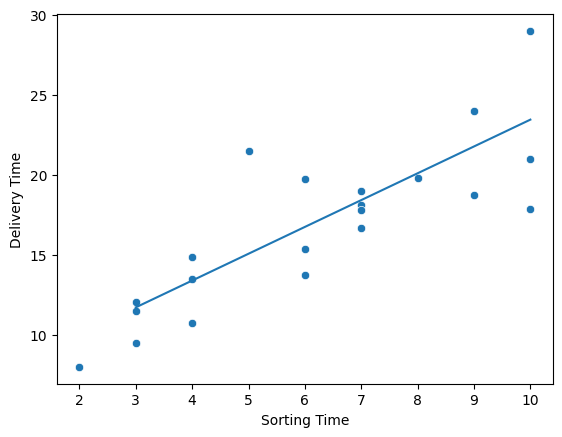

In [20]:
sns.scatterplot(x=df["Sorting Time"],y=df["Delivery Time"])
plt.plot(x_test,LR.predict(x_test))
plt.show()

In [21]:
LR.coef_

array([[1.67607075]])

In [22]:
LR.intercept_

array([6.69457991])

In [23]:
y_predicted = LR.predict(x_test)
y_predicted = np.round(y_predicted,2)
y_predicted

array([[23.46],
       [20.1 ],
       [18.43],
       [18.43],
       [11.72]])

In [24]:
x_test[0:,0]

array([10,  8,  7,  7,  3], dtype=int64)

In [25]:
y_test[0:,0]

array([21.  , 19.83, 18.11, 17.83,  9.5 ])

In [26]:
import statsmodels.formula.api as smf

In [27]:
linear_model = smf.ols("y~x",data=df).fit()

In [28]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        11:27:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming x and y are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create copies of the datasets for transformations
x_train_copy, x_test_copy, y_train_copy, y_test_copy = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

# Apply log transformation
x_train_copy_log = np.log(x_train_copy)
y_train_copy_log = np.log(y_train_copy)
x_test_copy_log = np.log(x_test_copy)
y_test_copy_log = np.log(y_test_copy)

# Apply square transformation
y_train_copy_square = y_train_copy**2
y_test_copy_square = y_test_copy**2
x_train_copy_square = x_train_copy**2
x_test_copy_square = x_test_copy**2
# Apply exponential transformation after scaling

# Scale features and target for exponential transformation
x_train_scaled = x_train_copy / np.max(np.abs(x_train_copy))
y_train_scaled = y_train_copy / np.max(np.abs(y_train_copy))
x_test_scaled = x_test_copy / np.max(np.abs(x_test_copy))
y_test_scaled = y_test_copy / np.max(np.abs(y_test_copy))

# Apply exponential transformation
x_train_copy_exp = np.exp(x_train_scaled)
y_train_copy_exp = np.exp(y_train_scaled)
x_test_copy_exp = np.exp(x_test_scaled)
y_test_copy_exp = np.exp(y_test_scaled)


# Fit linear regression models to each transformed dataset
model_original=LinearRegression().fit(x_train, y_train)
model_log = LinearRegression().fit(x_train_copy_log, y_train_copy_log)
model_square = LinearRegression().fit(x_train_copy_square, y_train_copy_square)
model_exp = LinearRegression().fit(x_train_copy_exp, y_train_copy_exp)

# Predict on the test set for each model
y_predict = model_original.predict(x_test)
y_predict_log = model_log.predict(x_test_copy_log)
y_predict_square = model_square.predict(x_test_copy_square)
y_predict_exp = model_exp.predict(y_test_copy_exp)

# Calculate RMSE for each transformed dataset
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
score['original score']=rmse
rmse_log = np.sqrt(mean_squared_error(y_test_copy, y_predict_log))
score['log tranform']=rmse_log
rmse_square = np.sqrt(mean_squared_error(y_test_copy, y_predict_square))
score['square tranform']=rmse_square
rmse_exp = np.sqrt(mean_squared_error(y_test_copy, y_predict_exp))
score['exp tranform']=rmse_exp

score = {'original transform': rmse,'log transform': rmse_log, 'square transform': rmse_square, 'exp transform': rmse_exp}


In [34]:
print(score)

{'original transform': 3.7478979383962754, 'log transform': 14.39940097005623, 'square transform': 442.45582258537036, 'exp transform': 15.1742847797983}
